# Customer Attrition Analysis

Customer Attrition/Churn is the rate at which a commercial customer leaves the commercial business and takes their money elsewhere.  Understanding customer churn is vital to the success of a company and a churn analysis is the first step to understanding the customer.Users can stop using a company’s product or service for a variety of reasons, such as affordability, dissatisfaction with the offering, and bad customer service.This project is to analyse for what reason customer churn happens.




In [1]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#Load the dataset
df=pd.read_csv("verizonet_data.csv")
df

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,72,NaN,Yes,22.77,No,No,NaN,...,Landers,92285,2182,0,5306,NaN,NaN,0,0,NaN
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,Adelanto,92301,18980,0,2140,NaN,NaN,2,0,NaN
7040,2234-XADUH,Yes,4,72,NaN,Yes,29.66,Yes,Yes,Cable,...,Amboy,92304,42,0,5560,NaN,NaN,2,0,4.0
7041,4801-JZAZL,Yes,1,11,NaN,No,0.00,No,Yes,DSL,...,Angelus Oaks,92305,301,0,2793,NaN,NaN,0,0,NaN


# Data Exploration

In [3]:
df.shape

(7043, 43)

In [4]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0


In [5]:
df.tail()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
7038,2569-WGERO,No,0,72,NaN,Yes,22.77,No,No,NaN,...,Landers,92285,2182,0,5306,NaN,NaN,0,0,NaN
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,Adelanto,92301,18980,0,2140,NaN,NaN,2,0,NaN
7040,2234-XADUH,Yes,4,72,NaN,Yes,29.66,Yes,Yes,Cable,...,Amboy,92304,42,0,5560,NaN,NaN,2,0,4.0
7041,4801-JZAZL,Yes,1,11,NaN,No,0.00,No,Yes,DSL,...,Angelus Oaks,92305,301,0,2793,NaN,NaN,0,0,NaN
7042,3186-AJIEK,No,0,66,NaN,Yes,30.96,No,Yes,Fiber Optic,...,Apple Valley,92308,28819,0,5097,NaN,NaN,1,2,NaN


In [6]:
#Quick data check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [7]:
#Statistical summary
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Zip Code,Population,Churn Status,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,93486.070567,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,1856.767505,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,90001.000000,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,92101.000000,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,93518.000000,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,95329.000000,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,96150.000000,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


# Exploratory Data Analysis

In [8]:
#To check whether there is any missing values
df.isnull().sum()

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

In [9]:
#To check whether there is any duplicate values
df.duplicated().sum()

0

There is no duplicate values in the dataset

It shows a significant percentage of customers churns and it is important to understand why these customers are churning.

In [11]:
#To count the churn status rate
df.value_counts('Churn Status')

Churn Status
0    5174
1    1869
Name: count, dtype: int64

# Handling missing values

In [12]:
df['Offer']=df['Offer'].fillna('Unknown')
df

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,Unknown,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,72,Unknown,Yes,22.77,No,No,NaN,...,Landers,92285,2182,0,5306,NaN,NaN,0,0,NaN
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,Adelanto,92301,18980,0,2140,NaN,NaN,2,0,NaN
7040,2234-XADUH,Yes,4,72,Unknown,Yes,29.66,Yes,Yes,Cable,...,Amboy,92304,42,0,5560,NaN,NaN,2,0,4.0
7041,4801-JZAZL,Yes,1,11,Unknown,No,0.00,No,Yes,DSL,...,Angelus Oaks,92305,301,0,2793,NaN,NaN,0,0,NaN


In [13]:
df['Internet Type']=df['Internet Type'].fillna(df['Internet Type'].mode())
df

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,Unknown,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,72,Unknown,Yes,22.77,No,No,NaN,...,Landers,92285,2182,0,5306,NaN,NaN,0,0,NaN
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,Adelanto,92301,18980,0,2140,NaN,NaN,2,0,NaN
7040,2234-XADUH,Yes,4,72,Unknown,Yes,29.66,Yes,Yes,Cable,...,Amboy,92304,42,0,5560,NaN,NaN,2,0,4.0
7041,4801-JZAZL,Yes,1,11,Unknown,No,0.00,No,Yes,DSL,...,Angelus Oaks,92305,301,0,2793,NaN,NaN,0,0,NaN


In [14]:
df['Churn Category']=df['Churn Category'].fillna('Unknown')
df

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,Unknown,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,72,Unknown,Yes,22.77,No,No,NaN,...,Landers,92285,2182,0,5306,Unknown,NaN,0,0,NaN
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,Adelanto,92301,18980,0,2140,Unknown,NaN,2,0,NaN
7040,2234-XADUH,Yes,4,72,Unknown,Yes,29.66,Yes,Yes,Cable,...,Amboy,92304,42,0,5560,Unknown,NaN,2,0,4.0
7041,4801-JZAZL,Yes,1,11,Unknown,No,0.00,No,Yes,DSL,...,Angelus Oaks,92305,301,0,2793,Unknown,NaN,0,0,NaN


In [15]:
df['Churn Reason']=df['Churn Reason'].fillna('Unknown')
df

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,Unknown,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,72,Unknown,Yes,22.77,No,No,NaN,...,Landers,92285,2182,0,5306,Unknown,Unknown,0,0,NaN
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,Adelanto,92301,18980,0,2140,Unknown,Unknown,2,0,NaN
7040,2234-XADUH,Yes,4,72,Unknown,Yes,29.66,Yes,Yes,Cable,...,Amboy,92304,42,0,5560,Unknown,Unknown,2,0,4.0
7041,4801-JZAZL,Yes,1,11,Unknown,No,0.00,No,Yes,DSL,...,Angelus Oaks,92305,301,0,2793,Unknown,Unknown,0,0,NaN


In [16]:
df['Customer Satisfaction rate']=df['Customer Satisfaction rate'].fillna(df['Customer Satisfaction rate'].mean())
df

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,Unknown,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,3.005453
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,3.005453
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,3.005453
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.000000
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,72,Unknown,Yes,22.77,No,No,NaN,...,Landers,92285,2182,0,5306,Unknown,Unknown,0,0,3.005453
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,Adelanto,92301,18980,0,2140,Unknown,Unknown,2,0,3.005453
7040,2234-XADUH,Yes,4,72,Unknown,Yes,29.66,Yes,Yes,Cable,...,Amboy,92304,42,0,5560,Unknown,Unknown,2,0,4.000000
7041,4801-JZAZL,Yes,1,11,Unknown,No,0.00,No,Yes,DSL,...,Angelus Oaks,92305,301,0,2793,Unknown,Unknown,0,0,3.005453


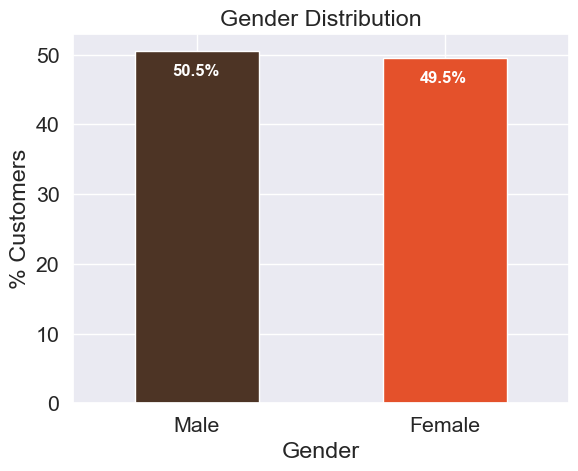

In [54]:
colors = ['#4D3425','#E4512B']
ax = (df['Gender'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True, rot=0, color = colors)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
   ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',fontsize=12,color='white', weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizens')

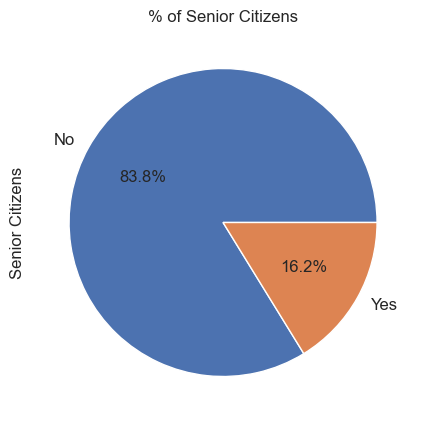

In [55]:
ax = (df['Senior Citizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

It shows 16.2% of the total customers are senior citizens

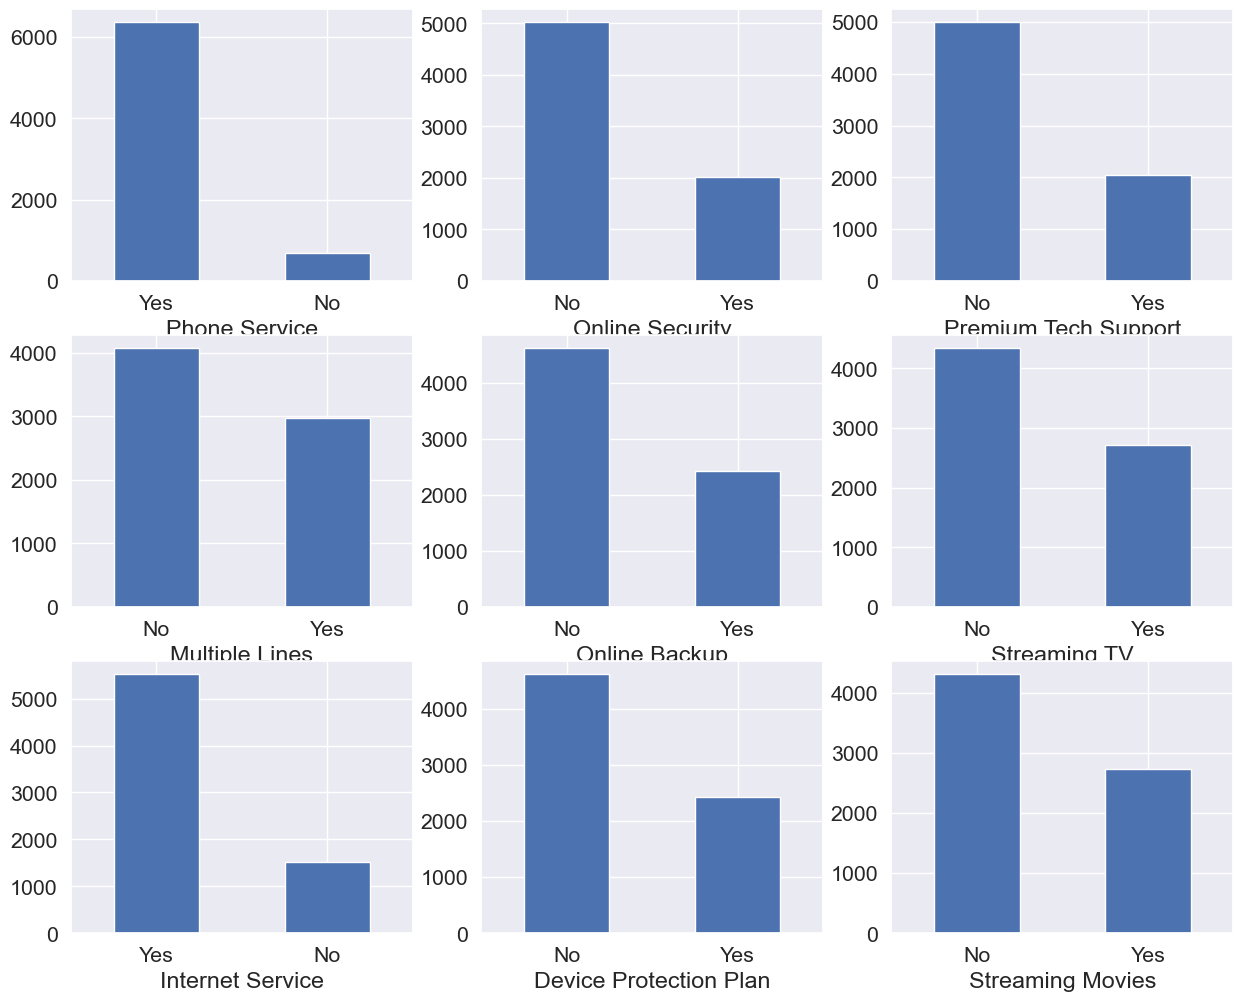

In [59]:
services= ['Phone Service','Multiple Lines','Internet Service','Online Security',
           'Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    #ax.set_title(item)

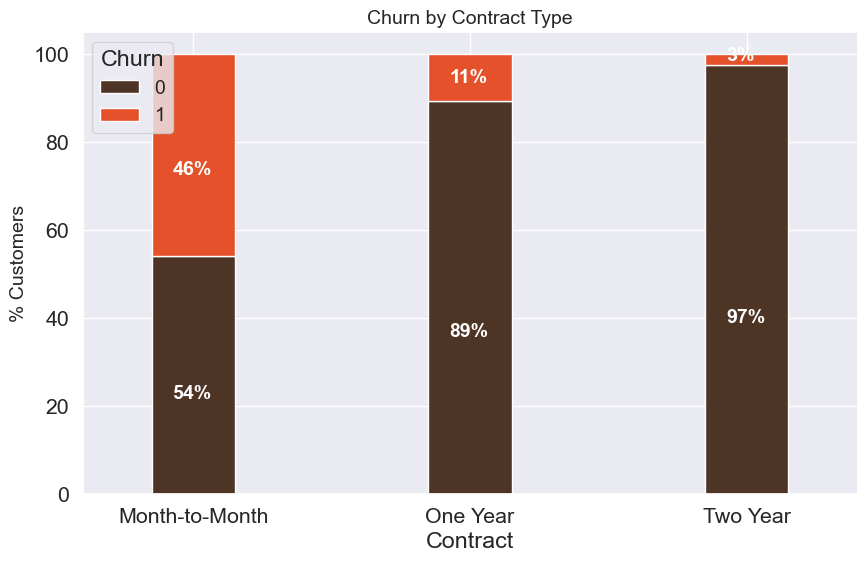

In [61]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['Contract','Churn Status']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True,rot = 0, figsize = (10,6),
                                                                color = colors)
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)
# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color ='white', weight = 'bold',size = 14)              

It shows the churn rate is high for the customers who have month-to-month contract.

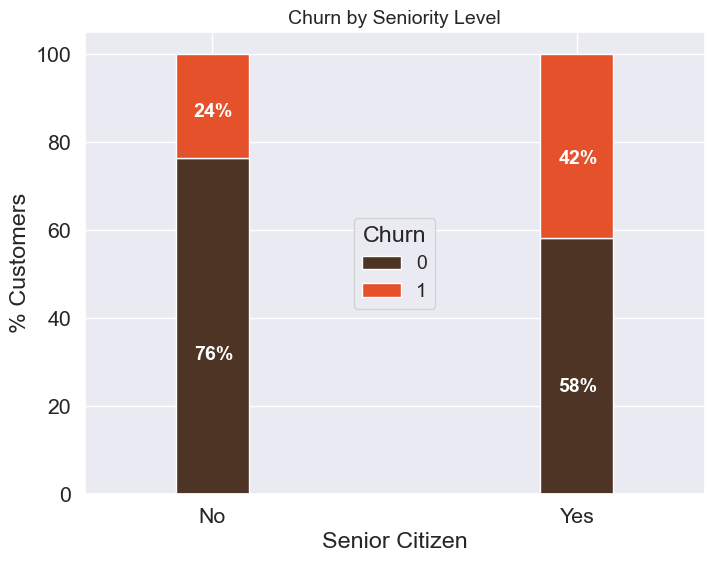

In [62]:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['Senior Citizen','Churn Status']).size().unstack()
ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar', width = 0.2,stacked=True,rot = 0,figsize = (8,6),
                                                                color = colors)
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

It shows the rate of churn is high in case of senior citizens.

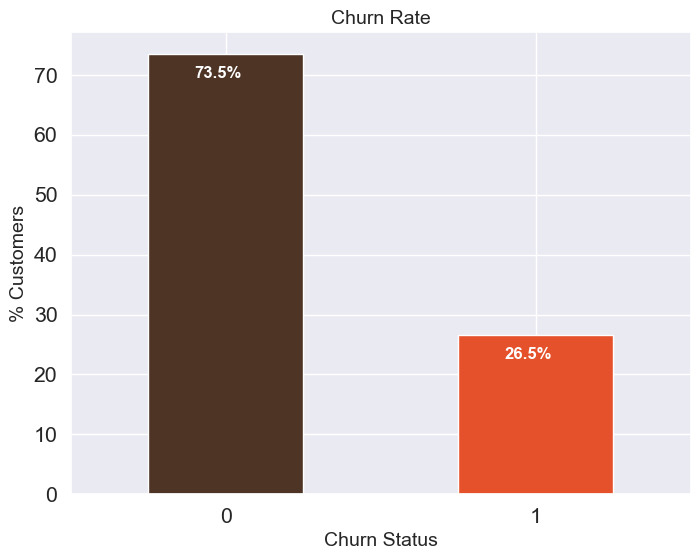

In [64]:
colors = ['#4D3425','#E4512B']
ax = (df['Churn Status'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors,figsize = (8,6))
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn Status',size = 14)
ax.set_title('Churn Rate', size = 14)
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Churn status is 26.5% that is a significant percentage of customers churn.

In [63]:
#Categorical variables
cat = df.drop(['Customer ID','Referred a Friend','Phone Service','Multiple Lines','Internet Service','Streaming TV','Premium Tech Support', 
               'Streaming Movies', 'Streaming Music', 'Paperless Billing','Gender', 'Under 30', 'Married', 'Offer','Online Backup',
               'Device Protection Plan','Unlimited Data','Payment Method','Churn Category','Churn Reason',
               'Dependents', 'City','Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
               'Monthly Charge', 'Total Regular Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges',
               'Age', 'Zip Code', 'Churn Status', 'CLTV', 'Total Customer Svc Requests', 'Product/Service Issues Reported', 'Customer Satisfaction rate',
               'Population'],axis=1)

cat.head()

,Internet Type,Online Security,Contract,Senior Citizen
0,Fiber Optic,No,Month-to-Month,Yes
1,Cable,No,Month-to-Month,Yes
2,Fiber Optic,No,Month-to-Month,Yes
3,Fiber Optic,No,Month-to-Month,Yes
4,Cable,No,Month-to-Month,Yes


In [36]:
#Label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cat = cat.apply(le.fit_transform)
df_cat.head()


,Internet Type,Online Security,Contract,Senior Citizen
0,2,0,0,1
1,0,0,0,1
2,2,0,0,1
3,2,0,0,1
4,0,0,0,1


In [37]:
#Numerical features
num=df[['Tenure in Months','Monthly Charge','Churn Status','Product/Service Issues Reported','CLTV',
    'Number of Referrals','Total Regular Charges','Customer Satisfaction rate','Population']]
num.head()

,Tenure in Months,Monthly Charge,Churn Status,Product/Service Issues Reported,CLTV,Number of Referrals,Total Regular Charges,Customer Satisfaction rate,Population
0,1,41.236,1,0,5433,0,39.65,3.005453,68701
1,8,83.876,1,0,5302,1,633.30,3.005453,55668
2,18,99.268,1,0,3179,0,1752.55,3.005453,47534
3,25,102.440,1,1,5337,1,2514.50,2.000000,27778
4,37,79.560,1,0,2793,1,2868.15,2.000000,26265


# Logistic Regression

In [86]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
finaldf = pd.merge(num, df_cat, left_index=True, right_index=True)
x=finaldf[['Customer Satisfaction rate',
    'Contract',
    'Monthly Charge',
    'Product/Service Issues Reported',
    'Internet Type',
    'Senior Citizen',
    'Tenure in Months',
    'Total Regular Charges',
    'CLTV','Online Security',
    'Number of Referrals',
    'Population']]  
y=finaldf['Churn Status']
#Split the training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [71]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')

cv_scores = cross_val_score(model, x_train, y_train, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.89007092 0.87943262 0.85106383 0.83510638 0.86856128 0.87744227
 0.88987567 0.87921847 0.85435169 0.86856128]
Mean Accuracy: 0.8693684416058854


In [72]:
# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(x_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

Accuracy: 0.8687012065294535

Confusion Matrix:
[[982  60]
 [125 242]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1042
           1       0.80      0.66      0.72       367

    accuracy                           0.87      1409
   macro avg       0.84      0.80      0.82      1409
weighted avg       0.86      0.87      0.86      1409



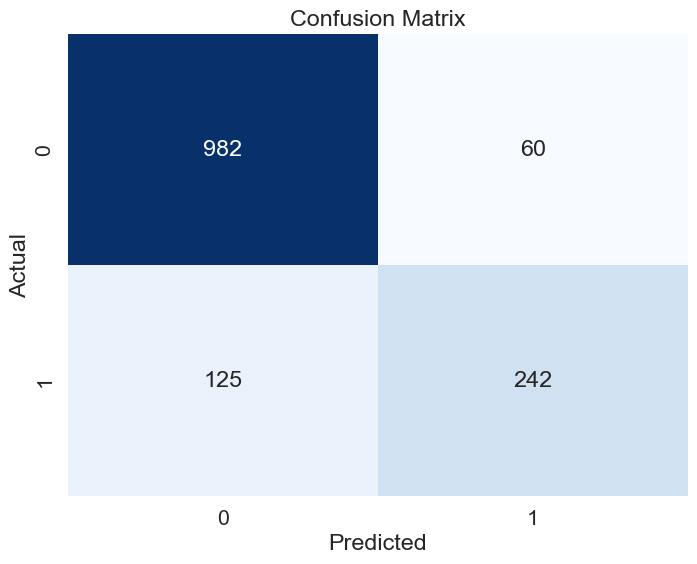

In [73]:
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

# Plot the confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x=finaldf[['Customer Satisfaction rate',
    'Contract',
    'Monthly Charge',
    'Product/Service Issues Reported',
    'Internet Type',
    'Senior Citizen',
    'Tenure in Months',
    'Total Regular Charges',
    'CLTV','Online Security',
    'Number of Referrals',
    'Population']]  
y=finaldf['Churn Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)  # You can adjust the number of estimators as needed

# Fit the model to the training data
rf_classifier.fit(x_train, y_train)
# Make predictions on the test data
y_pred_rf = rf_classifier.predict(x_test)
print(y_pred_rf)



[0 0 0 ... 1 1 0]


In [87]:
# Initialize the random forest classifier
forest_model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Fit the random forest model to the training data
rf_classifier.fit(x_train, y_train)

# Make predictions using the random forest model
y_pred_rf = rf_classifier.predict(x_test)

Cross-Validation Scores: [0.89512712 0.89724576 0.91737288 0.89819724 0.9088017 ]
Mean Accuracy: 0.9033489404532954



Random Forest Model:
Accuracy: 0.9127040454222853

Confusion Matrix:
[[999  43]
 [ 80 287]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1042
           1       0.87      0.78      0.82       367

    accuracy                           0.91      1409
   macro avg       0.90      0.87      0.88      1409
weighted avg       0.91      0.91      0.91      1409



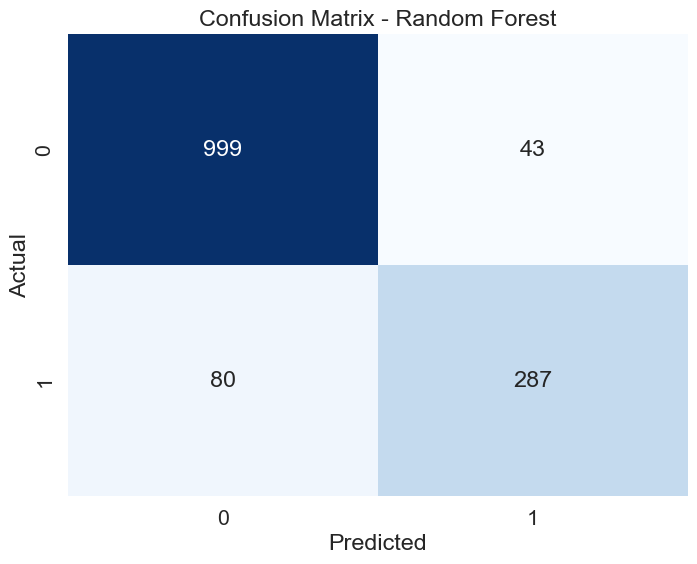

In [85]:
# Evaluate the random forest model
accuracy_forest = accuracy_score(y_test, y_pred_rf)
conf_matrix_forest = confusion_matrix(y_test, y_pred_rf)
classification_rep_forest = classification_report(y_test, y_pred_rf)

print("\nRandom Forest Model:")
print(f'Accuracy: {accuracy_forest}')
print('\nConfusion Matrix:')
print(conf_matrix_forest)
print('\nClassification Report:')
print(classification_rep_forest)

# Plot the confusion matrix for the random forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_forest, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x=finaldf[['Customer Satisfaction rate',
    'Contract',
    'Monthly Charge',
    'Product/Service Issues Reported',
    'Internet Type',
    'Senior Citizen',
    'Tenure in Months',
    'Total Regular Charges',
    'CLTV','Online Security',
    'Number of Referrals',
    'Population']]  
y=finaldf['Churn Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the model to the training data
clf.fit(x_train, y_train)
# Make predictions on the test data
y_pred = clf.predict(x_test)
print(y_test)

1332    1
2764    0
2703    0
2605    0
5990    0
       ..
4449    0
6971    0
2813    0
4184    0
5554    0
Name: Churn Status, Length: 1409, dtype: int64


In [27]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8545067423704755
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1048
           1       0.72      0.71      0.71       361

    accuracy                           0.85      1409
   macro avg       0.81      0.81      0.81      1409
weighted avg       0.85      0.85      0.85      1409

Confusion Matrix:
[[949  99]
 [106 255]]


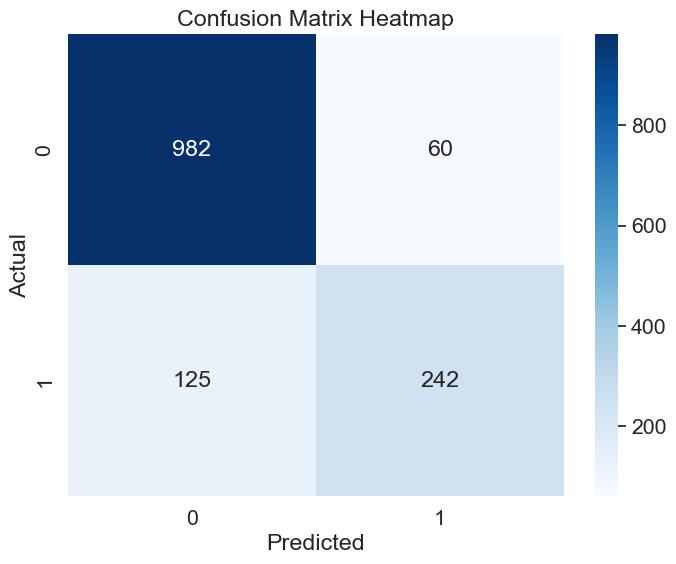

In [83]:
# Assuming you have already computed the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
            #xticklabels=species_mapping.values(), 
            #yticklabels=species_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Support Vector Machine

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
x=finaldf[['Customer Satisfaction rate',
    'Contract',
    'Monthly Charge',
    'Product/Service Issues Reported',
    'Internet Type',
    'Senior Citizen',
    'Tenure in Months',
    'Total Regular Charges',
    'CLTV','Online Security',
    'Number of Referrals',
    'Population']]  
y=finaldf['Churn Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernel functions (linear, rbf, etc.)

# Fit the model to the training data
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [50]:
# Make predictions on the test data
y_pred_svm = svm_classifier.predict(x_test)
print(y_pred_svm)

[0 0 1 ... 1 0 0]


SVM Accuracy: 0.8346344925479063
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1042
           1       0.75      0.55      0.63       367

    accuracy                           0.83      1409
   macro avg       0.80      0.74      0.76      1409
weighted avg       0.83      0.83      0.83      1409

 Confusion Matrix:
[[974  68]
 [165 202]]


<Axes: >

<Figure size 2800x2000 with 0 Axes>

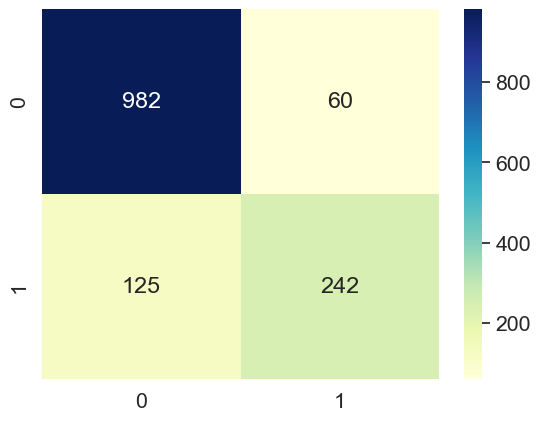

In [84]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Print a classification report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Print the confusion matrix
print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu") 
           


# Conclusion

Random forest classifier shows the accuracy more that is 91%.